In [2]:
%matplotlib notebook
import os
import pandas as pd 
import math
import numpy as np 
import matplotlib.pyplot as plt
import random as r 
import glob

In [3]:
# grab simulation and predicted dataframes 
#############################################

simfilepath = "/nBodyData/mathSim/batch3/batch3*"
alf = [i for i in glob.glob(simfilepath)]
sdf = pd.concat([pd.read_csv(f) for f in alf],sort=False)

# nnfile = "/nBodyData/pred/predicted_paths_3_combined.csv"
nnfile = "/nBodyData/pred/predicted_paths_batch_3_1.csv"
dataCols = ["x1tEnd_p", "x2tEnd_p", "x3tEnd_p", "y1tEnd_p", "y2tEnd_p", "y3tEnd_p","eventID"]
pdf = pd.read_csv(nnfile, names=dataCols)

In [4]:
# combine dataframes
###############################################

pdf.eventID = pdf.eventID.astype(int)
pdf.sort_values(["eventID"], axis=0, ascending=True, inplace= True) 

adf = pd.merge(left=sdf,right=pdf, on='eventID')
mdf = adf.drop_duplicates(subset='eventID')

<IPython.core.display.Javascript object>


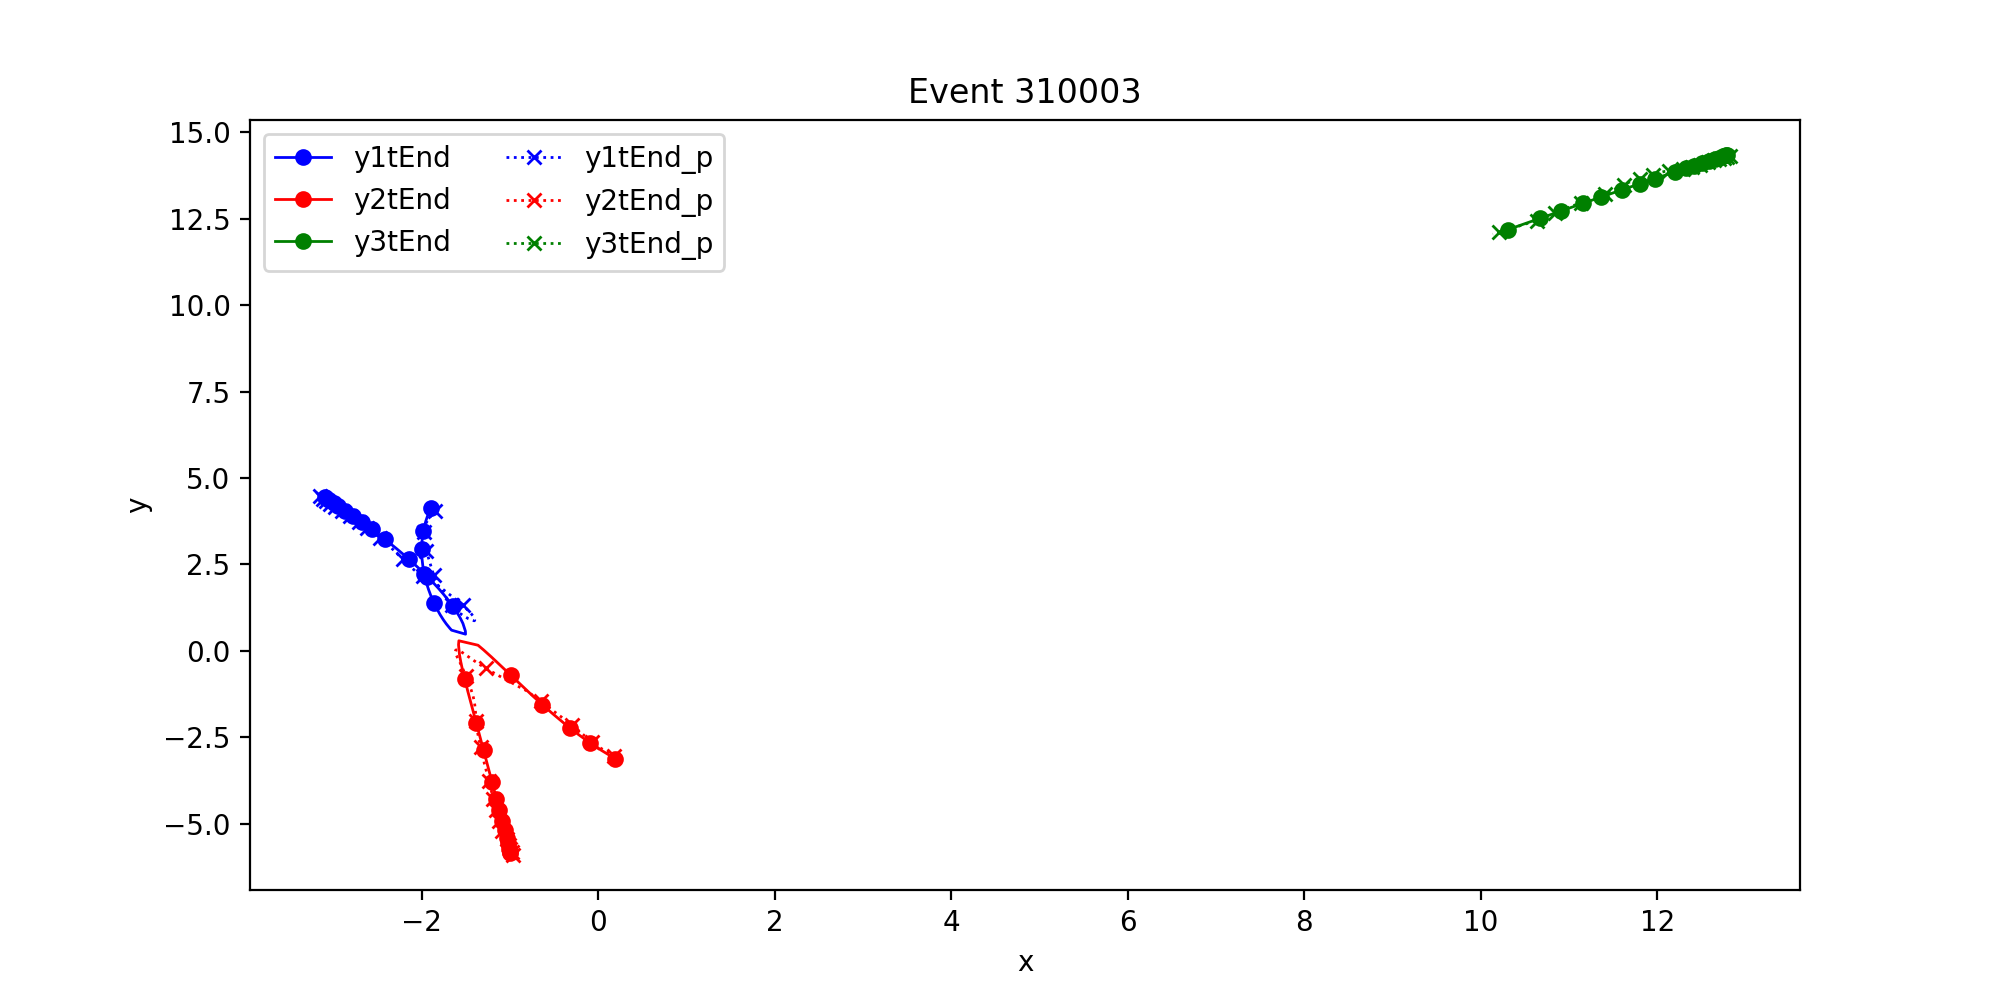

In [20]:
# plot an individual event
###############################################

# pick event to plot
r.seed(1)
indexArray = np.array(mdf['eventID'])
indexArray = np.unique((indexArray/10000).astype(int))
index = np.random.choice(indexArray)*10000
# print(index)

# plot event 
edf = mdf.loc[(mdf['eventID'] >= index) & (mdf['eventID'] <= (index+2560))]
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,5)

tsize = 5
ax.plot('x1tEnd', 'y1tEnd', data=edf, color='blue', marker='o',linewidth=1, markersize=tsize, markevery=30)
ax.plot('x2tEnd', 'y2tEnd', data=edf, color='red', marker='o',linewidth=1, markersize=tsize, markevery=30)
ax.plot('x3tEnd', 'y3tEnd', data=edf, color='green', marker='o',linewidth=1, markersize=tsize, markevery=30)

ax.plot('x1tEnd_p', 'y1tEnd_p', data=edf, color='blue', marker='x', linestyle=':', linewidth=1, markersize=tsize, markevery=30)
ax.plot('x2tEnd_p', 'y2tEnd_p', data=edf, color='red', marker='x', linestyle=':', linewidth=1, markersize=tsize, markevery=30)
ax.plot('x3tEnd_p', 'y3tEnd_p', data=edf, color='green', marker='x', linestyle=':', linewidth=1, markersize=tsize, markevery=30)

plt.legend(loc='best', ncol=2, fancybox=True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Event {0}'.format(int(index/10000)))
plt.show()

In [61]:
# define possible metrics
#####################################

# barycenter
mdf['ibaryX'] = (mdf['m1']*mdf['x1']+mdf['m2']*mdf['x2']+mdf['m3']*mdf['x3'])/(mdf['m1']+mdf['m2']+mdf['m3'])
mdf['ibaryY'] = (mdf['m1']*mdf['y1']+mdf['m2']*mdf['y2']+mdf['m3']*mdf['y3'])/(mdf['m1']+mdf['m2']+mdf['m3'])
mdf['baryX'] = (mdf['m1']*mdf['x1tEnd']+mdf['m2']*mdf['x2tEnd']+mdf['m3']*mdf['x3tEnd'])/(mdf['m1']+mdf['m2']+mdf['m3'])
mdf['baryY'] = (mdf['m1']*mdf['y1tEnd']+mdf['m2']*mdf['y2tEnd']+mdf['m3']*mdf['y3tEnd'])/(mdf['m1']+mdf['m2']+mdf['m3'])
mdf['baryX_p'] = (mdf['m1']*mdf['x1tEnd_p']+mdf['m2']*mdf['x2tEnd_p']+mdf['m3']*mdf['x3tEnd_p'])/(mdf['m1']+mdf['m2']+mdf['m3'])
mdf['baryY_p'] = (mdf['m1']*mdf['y1tEnd_p']+mdf['m2']*mdf['y2tEnd_p']+mdf['m3']*mdf['y3tEnd_p'])/(mdf['m1']+mdf['m2']+mdf['m3'])
mdf['baryDiffX'] = np.abs(mdf['baryX']-mdf['ibaryX'])
mdf['baryDiffY'] = np.abs(mdf['baryY']-mdf['ibaryY'])
mdf['baryDiffX_p'] = np.abs(mdf['baryX_p']-mdf['ibaryX'])
mdf['baryDiffY_p'] = np.abs(mdf['baryY_p']-mdf['ibaryY'])

# energy



# moment of inertia
mdf['imomentX'] = mdf['m1']*(mdf['x1']**2) + mdf['m2']*(mdf['x2']**2) + mdf['m3']*(mdf['x3']**2)
mdf['momentX'] = mdf['m1']*(mdf['x1tEnd']**2) + mdf['m2']*(mdf['x2tEnd']**2) + mdf['m3']*(mdf['x3tEnd']**2)
mdf['momentX_p'] = mdf['m1']*(mdf['x1tEnd_p']**2) + mdf['m2']*(mdf['x2tEnd_p']**2) + mdf['m3']*(mdf['x3tEnd_p']**2)
mdf['imomentY'] = mdf['m1']*(mdf['y1']**2) + mdf['m2']*(mdf['y2']**2) + mdf['m3']*(mdf['y3']**2)
mdf['momentY'] = mdf['m1']*(mdf['y1tEnd']**2) + mdf['m2']*(mdf['y2tEnd']**2) + mdf['m3']*(mdf['y3tEnd']**2)
mdf['momentY_p'] = mdf['m1']*(mdf['y1tEnd_p']**2) + mdf['m2']*(mdf['y2tEnd_p']**2) + mdf['m3']*(mdf['y3tEnd_p']**2)
mdf['momentDiffX'] = np.abs(mdf['momentX']-mdf['imomentX'])
mdf['momentDiffY'] = np.abs(mdf['momentY']-mdf['imomentY'])
mdf['momentDiffX_p'] = np.abs(mdf['momentX_p']-mdf['imomentX'])
mdf['momentDiffY_p'] = np.abs(mdf['momentY_p']-mdf['imomentY'])


# momentum/angular momentum

<IPython.core.display.Javascript object>


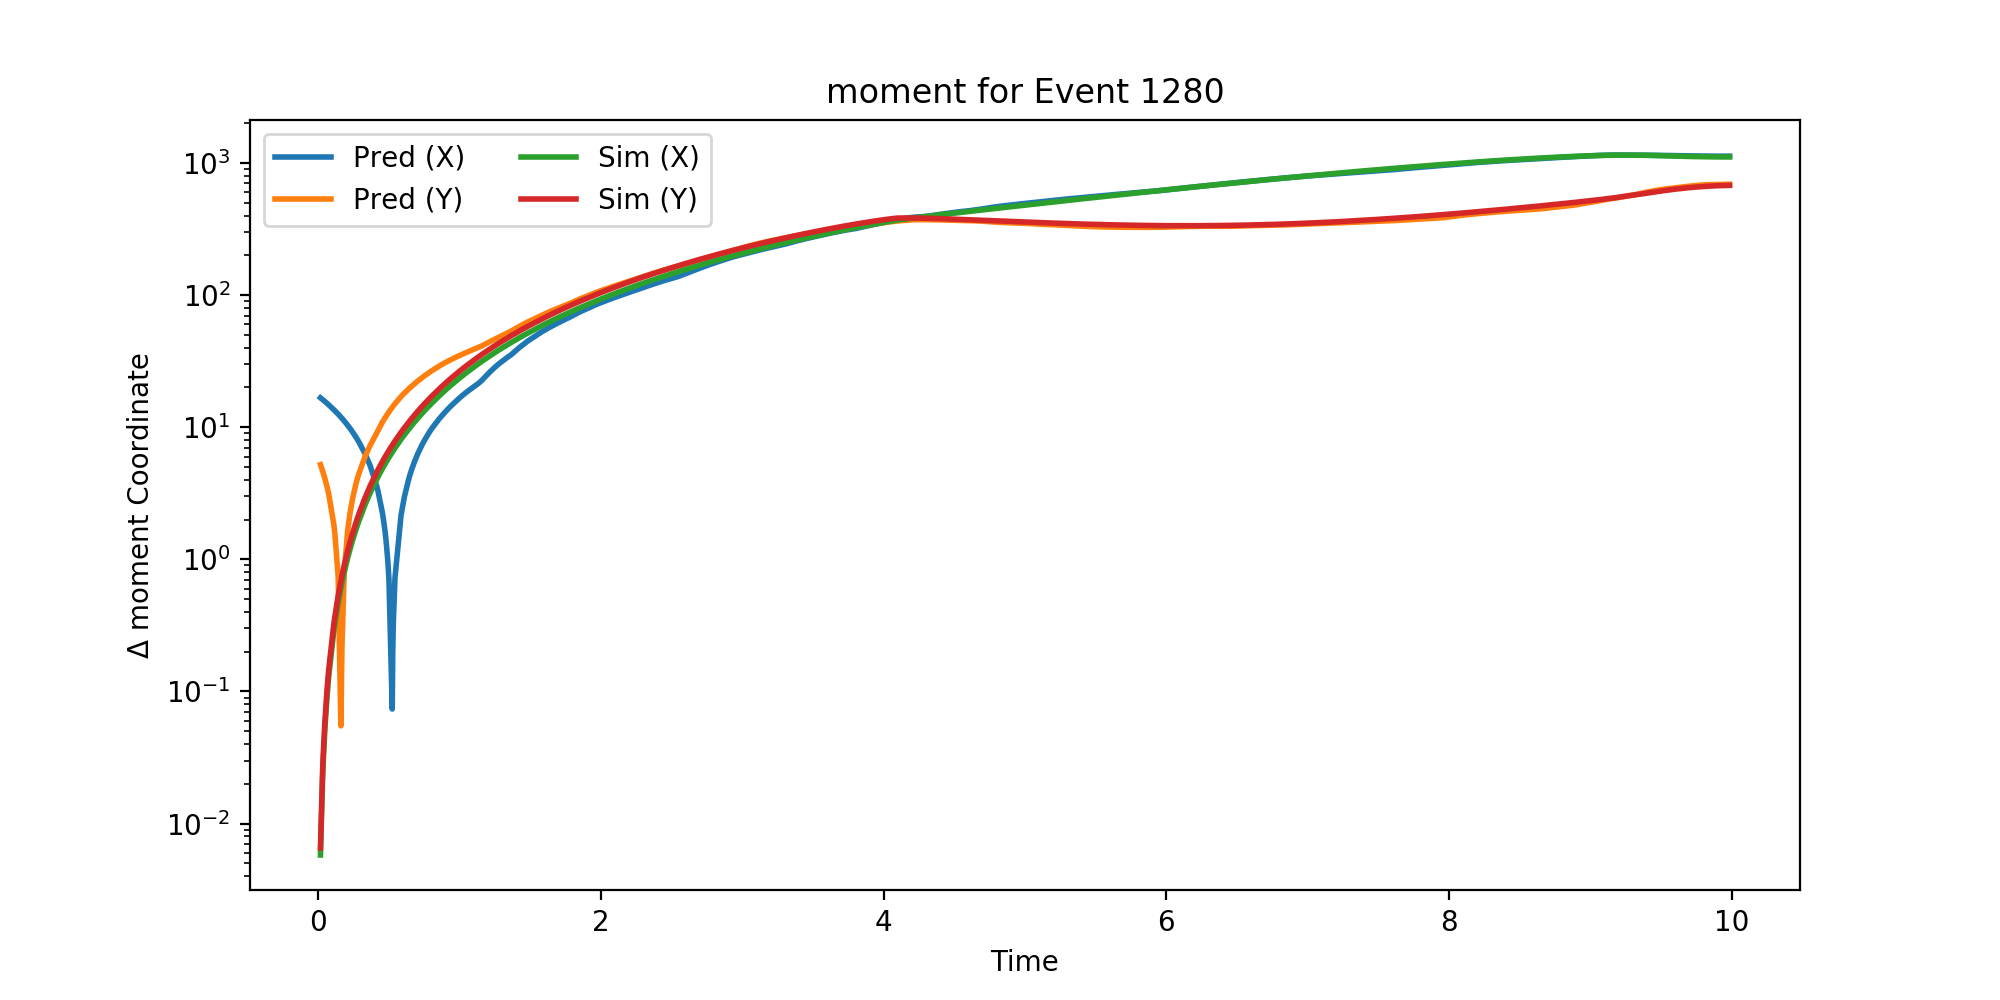

In [69]:
# plot metric (for all or 1 event)
####################################
singleEvent = True
metric = "moment" # currently availible metrics: bary, moment

# pick event to plot
r.seed(1)
indexArray = np.array(mdf['eventID'])
indexArray = np.unique((indexArray/10000).astype(int))
index = np.random.choice(indexArray)*10000
# print(index)
ddf = mdf
edf = mdf.loc[(mdf['eventID'] >= index) & (mdf['eventID'] <= (index+2560))]
if singleEvent: ddf = edf

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,5)

bsize = 1
lsize = 0
if singleEvent: 
    bsize = 0
    lsize = 2
ax.plot('tEnd', '{0}DiffX_p'.format(metric), data=ddf, markersize=bsize, marker='o', linewidth=lsize)
ax.plot('tEnd', '{0}DiffY_p'.format(metric), data=ddf, markersize=bsize, marker='o', linewidth=lsize)

ax.plot('tEnd', '{0}DiffX'.format(metric), data=ddf, markersize=bsize, marker='o', linewidth=lsize)
ax.plot('tEnd', '{0}DiffY'.format(metric), data=ddf, markersize=bsize, marker='o', linewidth=lsize)

ax.set_yscale('log')
plt.xlabel('Time')
plt.ylabel('Δ {0} Coordinate'.format(metric))
if singleEvent: plt.title("{0} for Event {1}".format(metric,index%2560))
else: plt.title("{0} for All events".format(metric))
plt.legend(("Pred (X)", "Pred (Y)", "Sim (X)", "Sim (Y)"),loc='best', ncol=2, fancybox=True)
plt.show()